#### THIS NOTEBOOK REQUIRES PYTHON >= 3.9

In [1]:
!pip install -q git+https://github.com/bowang-lab/MedSAM.git

In [11]:
# download model and data
!wget -O img_demo.png https://raw.githubusercontent.com/bowang-lab/MedSAM/main/assets/img_demo.png
!wget -O medsam_vit_b.pth https://zenodo.org/records/10689643/files/medsam_vit_b.pth

--2024-06-17 20:26:08--  https://raw.githubusercontent.com/bowang-lab/MedSAM/main/assets/img_demo.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87865 (86K) [image/png]
Saving to: ‘img_demo.png’

img_demo.png        100%[===================>]  85.81K  --.-KB/s    in 0.07s   

2024-06-17 20:26:08 (1.15 MB/s) - ‘img_demo.png’ saved [87865/87865]

--2024-06-17 20:26:09--  https://zenodo.org/records/10689643/files/medsam_vit_b.pth
Resolving zenodo.org (zenodo.org)... 188.185.79.172, 188.184.103.159, 188.184.98.238, ...
Connecting to zenodo.org (zenodo.org)|188.185.79.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375049145 (358M) [application/octet-stream]
Saving to: ‘medsam_vit_b.pth’

medsam_vit_b.pth    100%[===============

In [1]:
import sys
sys.path.append("/home/jovyan/easl-eye")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from cateyes import plot_segmentation, continuous_to_discrete, discrete_to_continuous

## Local Package
import easl_eye as eye
from easl_eye.io import *
from easl_eye.preprocess import eyes as blink
from easl_eye.viz import raw_gaze_plot, session_video

In [3]:
# Loading the two different datasets
image_tracking = get_viewer_tracking_info(url="http://amc-tensor1.ucdenver.pvt/eyetracking")
eye_tracking = load_eyetracking_data(fname="test_gaze_data.csv")

In [4]:
eye_tracking = blink.format_data(eye_tracking, 
                                 screen_size=(59.789,33.631), # cm
                                 screen_res=(2560,1440), # px
                                 viewing_dist=82) # cm

In [5]:
aligned_data = eye.align_tracking_data(image_tracking=image_tracking, eye_tracking=eye_tracking)

/home/jovyan/easl-eye/easl_eye/integrate.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_tracking['ui_timestamp_us'] = image_tracking['ui_timestamp'].apply(convert2us)
/home/jovyan/easl-eye/easl_eye/integrate.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_tracking['adjusted_timestamp'] = image_tracking['ui_timestamp_us'].apply(
/home/jovyan/easl-eye/easl_eye/integrate.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [6]:
aligned_data = blink.classify(aligned_data , 'right', [0.3026622037, 0.82349537])
aligned_data = blink.classify(aligned_data , 'left', [0.3026622037, 0.82349537])

/opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [7]:
instance_map = pd.read_csv('./inst-map.csv')

In [8]:
instance_map

,Unnamed: 0,instance,id
0,0,526850d1-d102a959-7d63b0ca-e34bbcb4-8dbef6e6,1.3.12.2.1107.5.2.30.25033.3.20080605172048878...
1,1,09d21102-426cc17b-02b9d991-3ca8f7f8-9b182ae0,1.3.12.2.1107.5.2.30.25033.3.20080605172045231...
2,2,4c753543-4bf6aa29-ad9bf324-d9ea52fa-61e3dc94,1.3.12.2.1107.5.2.30.25033.3.20080605172053594...
3,3,0f536b36-e10c5b40-b94fdcc8-6d76c582-cb35a932,1.3.12.2.1107.5.2.30.25033.3.20080605172055396...
4,4,78e0360e-c27d31be-0624609d-a6b0128d-98a6b73f,1.3.12.2.1107.5.2.30.25033.3.20080605172049630...
...,...,...,...
43615,43615,1d650b8d-065fc8e8-8fe0f058-9970f833-08f4d085,1.3.6.1.4.1.23849.477400917.11.163702192267329...
43616,43616,6ce7309a-2ec5e19c-7edb3826-c9218053-43c95f39,1.3.6.1.4.1.23849.477400917.11.163702192267329...
43617,43617,7e3f369a-6bf92f9b-129f40e6-cb401875-5162763b,1.3.6.1.4.1.23849.477400917.11.163702192267329...
43618,43618,968f32b9-2053e68e-d70c6813-c9034e5b-999187db,1.3.6.1.4.1.23849.477400917.11.163702192267329...


/tmp/ipykernel_17368/3053834392.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmp = aligned_data.loc[aligned_data['current_uid'] == aligned_data.current_uid[idx],
/tmp/ipykernel_17368/3053834392.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  px = eye.get_pixel_array(aligned_data.current_uid[idx], instance_map)


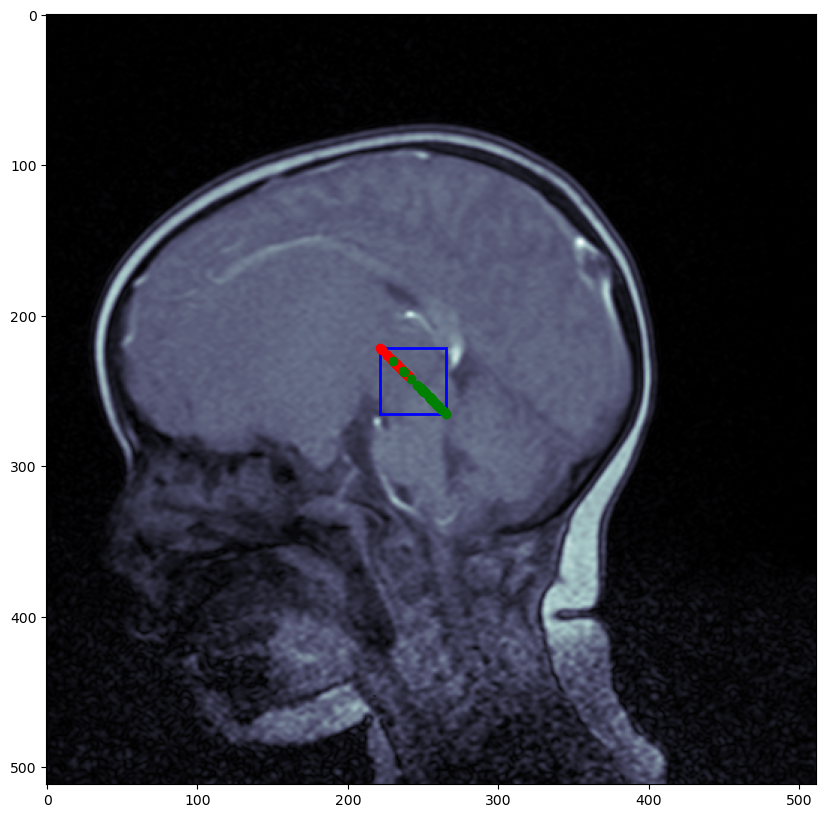

In [10]:
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='blue', facecolor=(0,0,0,0), lw=2))


idx = 4

fig, ax = plt.subplots(figsize=(10, 10))

tmp = aligned_data.loc[aligned_data['current_uid'] == aligned_data.current_uid[idx], 
                       ['right_x', 'right_y', 'left_x', 'left_y']]

tmp['right_x'] = tmp['right_x'].apply(float) * 900
tmp['right_y'] = tmp['right_y'].apply(float) * 900
tmp['left_x'] = tmp['left_x'].apply(float) * 900
tmp['left_y'] = tmp['left_y'].apply(float) * 900

x1 = min([tmp['right_x'].min(), tmp['left_x'].min()])
x2 = max([tmp['right_x'].max(), tmp['left_x'].max()])
y1 = min([tmp['right_y'].min(), tmp['left_y'].min()])
y2 = max([tmp['right_y'].max(), tmp['left_y'].max()])

px = eye.get_pixel_array(aligned_data.current_uid[idx], instance_map)
ax.imshow(px, cmap=plt.cm.bone, zorder=1)
ax.scatter(
    tmp['right_x'], 
    tmp['right_y'],
    c='red', zorder=2)
ax.scatter(
    tmp['left_x'], 
    tmp['left_y'],
    c='green', zorder=3)
show_box(box=[x1, y1, x2, y2], ax=ax)
plt.show()

In [14]:
# %% environment and functions
import numpy as np
import matplotlib.pyplot as plt
import os
join = os.path.join
import torch
from segment_anything import sam_model_registry
from skimage import io, transform
import torch.nn.functional as F

# visualization functions
# source: https://github.com/facebookresearch/segment-anything/blob/main/notebooks/predictor_example.ipynb
# change color to avoid red and green
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([251/255, 252/255, 30/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='blue', facecolor=(0,0,0,0), lw=2))

@torch.no_grad()
def medsam_inference(medsam_model, img_embed, box_1024, H, W):
    box_torch = torch.as_tensor(box_1024, dtype=torch.float, device=img_embed.device)
    if len(box_torch.shape) == 2:
        box_torch = box_torch[:, None, :] # (B, 1, 4)

    sparse_embeddings, dense_embeddings = medsam_model.prompt_encoder(
        points=None,
        boxes=box_torch,
        masks=None,
    )
    low_res_logits, _ = medsam_model.mask_decoder(
        image_embeddings=img_embed, # (B, 256, 64, 64)
        image_pe=medsam_model.prompt_encoder.get_dense_pe(), # (1, 256, 64, 64)
        sparse_prompt_embeddings=sparse_embeddings, # (B, 2, 256)
        dense_prompt_embeddings=dense_embeddings, # (B, 256, 64, 64)
        multimask_output=False,
        )

    low_res_pred = torch.sigmoid(low_res_logits)  # (1, 1, 256, 256)

    low_res_pred = F.interpolate(
        low_res_pred,
        size=(H, W),
        mode="bilinear",
        align_corners=False,
    )  # (1, 1, gt.shape)
    low_res_pred = low_res_pred.squeeze().cpu().numpy()  # (256, 256)
    medsam_seg = (low_res_pred > 0.5).astype(np.uint8)
    return medsam_seg


In [20]:
#%% load model and image
MedSAM_CKPT_PATH = "/home/jovyan/medsam_vit_b.pth"
device = "cpu"
medsam_model = sam_model_registry['vit_b'](checkpoint=MedSAM_CKPT_PATH)
medsam_model = medsam_model.to(device)
medsam_model.eval()

img_np = io.imread('/home/jovyan//img_demo.png')
if len(img_np.shape) == 2:
    img_3c = np.repeat(img_np[:, :, None], 3, axis=-1)
else:
    img_3c = img_np
H, W, _ = img_3c.shape

In [21]:
#%% image preprocessing and model inference
img_1024 = transform.resize(img_3c, (1024, 1024), order=3, preserve_range=True, anti_aliasing=True).astype(np.uint8)
img_1024 = (img_1024 - img_1024.min()) / np.clip(
    img_1024.max() - img_1024.min(), a_min=1e-8, a_max=None
)  # normalize to [0, 1], (H, W, 3)
# convert the shape to (3, H, W)
img_1024_tensor = torch.tensor(img_1024).float().permute(2, 0, 1).unsqueeze(0).to(device)

box_np = np.array([[95,255, 190, 350]])
# transfer box_np t0 1024x1024 scale
box_1024 = box_np / np.array([W, H, W, H]) * 1024
with torch.no_grad():
    image_embedding = medsam_model.image_encoder(img_1024_tensor) # (1, 256, 64, 64)

medsam_seg = medsam_inference(medsam_model, image_embedding, box_1024, H, W)

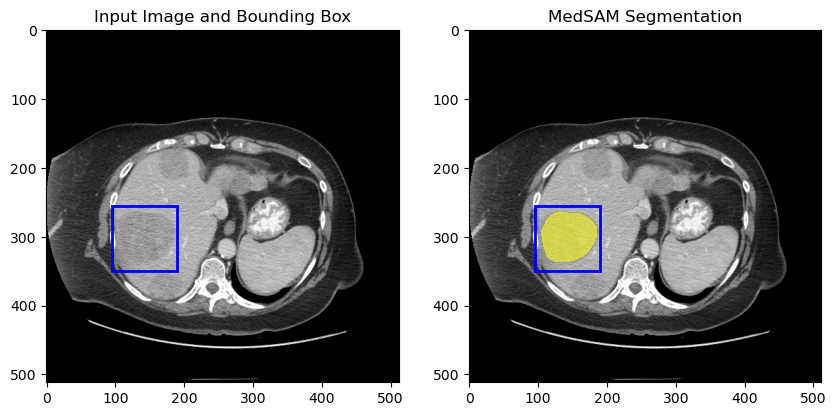

In [22]:
#%% visualize results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_3c)
show_box(box_np[0], ax[0])
ax[0].set_title("Input Image and Bounding Box")
ax[1].imshow(img_3c)
show_mask(medsam_seg, ax[1])
show_box(box_np[0], ax[1])
ax[1].set_title("MedSAM Segmentation")
plt.show()

In [ ]:


[x1, y1, x2, y2]

In [48]:
idx = 33

## Get bounding box info from eye-tracking data
tmp = aligned_data.loc[aligned_data['current_uid'] == aligned_data.current_uid[idx], 
                       ['right_x', 'right_y', 'left_x', 'left_y']]

tmp['right_x'] = tmp['right_x'].apply(float) * 900
tmp['right_y'] = tmp['right_y'].apply(float) * 900
tmp['left_x'] = tmp['left_x'].apply(float) * 900
tmp['left_y'] = tmp['left_y'].apply(float) * 900

x1 = min([tmp['right_x'].min(), tmp['left_x'].min()])
x2 = max([tmp['right_x'].max(), tmp['left_x'].max()])
y1 = min([tmp['right_y'].min(), tmp['left_y'].min()])
y2 = max([tmp['right_y'].max(), tmp['left_y'].max()])

## Get Image
img_np = eye.get_pixel_array(aligned_data.current_uid[idx], instance_map)
if len(img_np.shape) == 2:
    img_3c = np.repeat(img_np[:, :, None], 3, axis=-1)
else:
    img_3c = img_np
H, W, _ = img_3c.shape

#%% image preprocessing and model inference
img_1024 = transform.resize(img_3c, (1024, 1024), order=3, preserve_range=True, anti_aliasing=True).astype(np.uint8)
img_1024 = (img_1024 - img_1024.min()) / np.clip(
    img_1024.max() - img_1024.min(), a_min=1e-8, a_max=None
)  # normalize to [0, 1], (H, W, 3)
# convert the shape to (3, H, W)
img_1024_tensor = torch.tensor(img_1024).float().permute(2, 0, 1).unsqueeze(0).to(device)

# box_np = np.array([[95,255, 190, 350]])
box_np = np.array([[x1, y1, x2, y2]])
# transfer box_np t0 1024x1024 scale
box_1024 = box_np / np.array([W, H, W, H]) * 1024
with torch.no_grad():
    image_embedding = medsam_model.image_encoder(img_1024_tensor) # (1, 256, 64, 64)

medsam_seg = medsam_inference(medsam_model, image_embedding, box_1024, H, W)

/tmp/ipykernel_17368/3988966444.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmp = aligned_data.loc[aligned_data['current_uid'] == aligned_data.current_uid[idx],
/tmp/ipykernel_17368/3988966444.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  img_np = eye.get_pixel_array(aligned_data.current_uid[idx], instance_map)


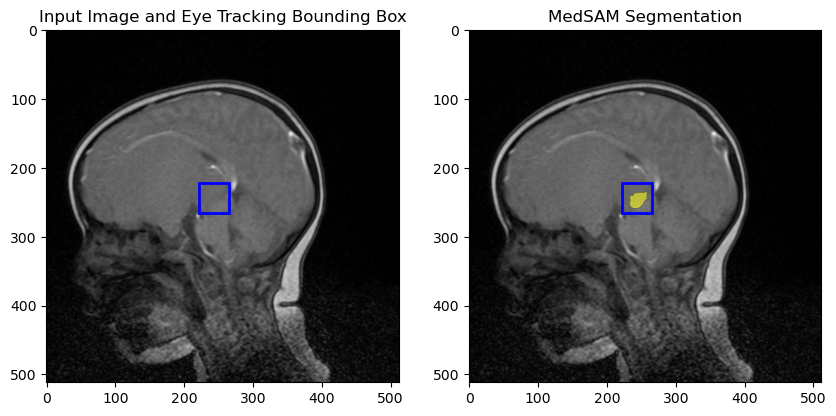

In [50]:
#%% visualize results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_3c, cmap=plt.cm.bone)
show_box(box_np[0], ax[0])
ax[0].set_title("Input Image and Eye Tracking Bounding Box")
ax[1].imshow(img_3c, cmap=plt.cm.bone)
show_mask(medsam_seg, ax[1])
show_box(box_np[0], ax[1])
ax[1].set_title("MedSAM Segmentation")
plt.show()

In [56]:
looking_at_data = aligned_data.loc[:,['right_x', 'right_y', 'left_x', 'left_y', 'current_uid', 'in_roi_filter_x']].loc[aligned_data['in_roi_filter_x'] == True]

In [310]:
def segment_image(aligned_data, idx, bbox=None, save_path=None):
    ## Get bounding box info from eye-tracking data
    tmp = aligned_data.loc[aligned_data['current_uid'] == aligned_data.current_uid[idx], 
                           ['right_x', 'right_y', 'left_x', 'left_y']]
    
    tmp['right_x'] = tmp['right_x'].apply(float) * 900
    tmp['right_y'] = tmp['right_y'].apply(float) * 900
    tmp['left_x'] = tmp['left_x'].apply(float) * 900
    tmp['left_y'] = tmp['left_y'].apply(float) * 900
    
    x1 = min([tmp['right_x'].min(), tmp['left_x'].min()])
    x2 = max([tmp['right_x'].max(), tmp['left_x'].max()])
    y1 = min([tmp['right_y'].min(), tmp['left_y'].min()])
    y2 = max([tmp['right_y'].max(), tmp['left_y'].max()])
    
    ## Get Image
    img_np = eye.get_pixel_array(aligned_data.current_uid[idx], instance_map)
    img_np = transform.resize(img_np, (900, 900), order=3, preserve_range=True, anti_aliasing=True).astype(np.uint8)
    if len(img_np.shape) == 2:
        img_3c = np.repeat(img_np[:, :, None], 3, axis=-1)
    else:
        img_3c = img_np
    H, W, _ = img_3c.shape
    
    #%% image preprocessing and model inference
    img_1024 = transform.resize(img_3c, (1024, 1024), order=3, preserve_range=True, anti_aliasing=True).astype(np.uint8)
    img_1024 = (img_1024 - img_1024.min()) / np.clip(
        img_1024.max() - img_1024.min(), a_min=1e-8, a_max=None
    )  # normalize to [0, 1], (H, W, 3)
    # convert the shape to (3, H, W)
    img_1024_tensor = torch.tensor(img_1024).float().permute(2, 0, 1).unsqueeze(0).to(device)
    
    # box_np = np.array([[95,255, 190, 350]])
    if bbox is None:
        box_np = np.array([[x1, y1, x2, y2]])
    else:
        box_np = bbox
    print(box_np)
    # transfer box_np t0 1024x1024 scale
    box_1024 = box_np / np.array([W, H, W, H]) * 1024
    with torch.no_grad():
        image_embedding = medsam_model.image_encoder(img_1024_tensor) # (1, 256, 64, 64)
    
    medsam_seg = medsam_inference(medsam_model, image_embedding, box_1024, H, W)

    #%% visualize results
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img_3c, cmap=plt.cm.bone)
    show_box(box_np[0], ax[0])
    ax[0].set_title("Input Image and Eye Tracking Bounding Box")
    ax[1].imshow(img_3c, cmap=plt.cm.bone)
    show_mask(medsam_seg, ax[1])
    show_box(box_np[0], ax[1])
    ax[1].set_title("MedSAM Segmentation")
    if save_path is not None:
        plt.savefig(save_path, bbox_inches='tight')

/tmp/ipykernel_17368/3485936917.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmp = aligned_data.loc[aligned_data['current_uid'] == aligned_data.current_uid[idx],
/tmp/ipykernel_17368/3485936917.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  img_np = eye.get_pixel_array(aligned_data.current_uid[idx], instance_map)


[[270.57968974 270.57968974 305.62146306 305.62146306]]


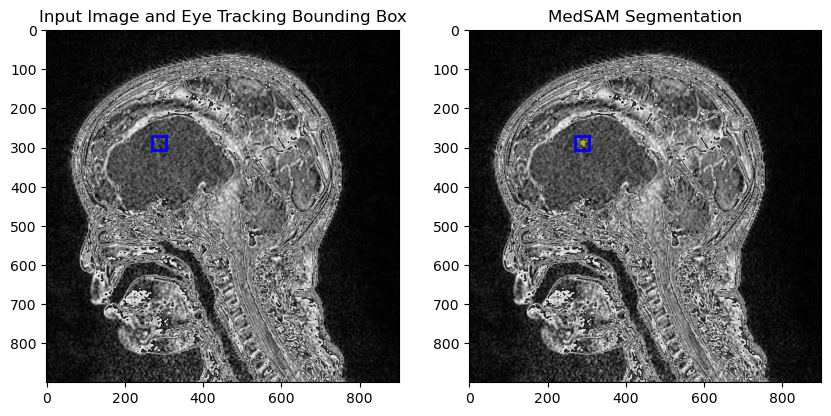

In [311]:
segment_image(looking_at_data, 33)

/tmp/ipykernel_17368/3485936917.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tmp = aligned_data.loc[aligned_data['current_uid'] == aligned_data.current_uid[idx],
/tmp/ipykernel_17368/3485936917.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  img_np = eye.get_pixel_array(aligned_data.current_uid[idx], instance_map)


[[125, 200, 520, 506]]


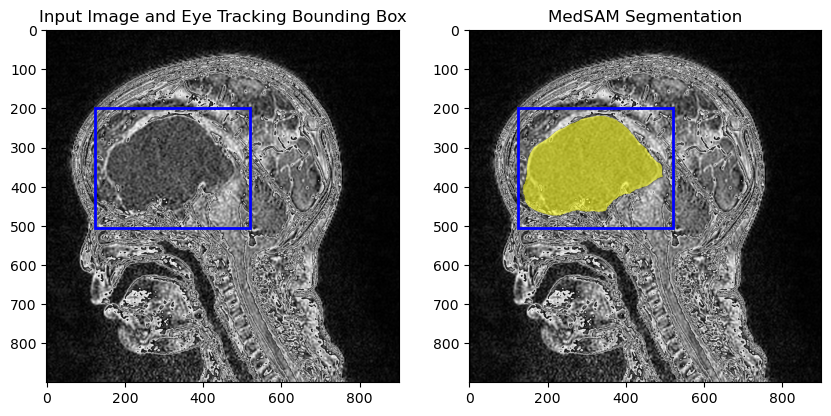

In [312]:
segment_image(looking_at_data, 33, bbox = [[125, 200, 520, 506]], save_path='./bbox-example-eye-tracking-manual-annot.png')

In [114]:
import numpy as np
import cv2

def region_growing(img, seed):
    # parameters
    height, width = img.shape
    threshold = 20

    # initialization
    visited = np.zeros_like(img, dtype=np.uint8)
    dx = [-1, 0, 1, 0]
    dy = [0, -1, 0, 1]
    stack = [(seed)]

    # bounding box initialization
    min_x, min_y, max_x, max_y = width, height, 0, 0

    while len(stack) > 0:
        s = stack.pop()
        x, y = s

        if np.abs(int(img[x, y]) - int(img[seed])) <= threshold and visited[x, y] == 0:
            visited[x, y] = 255

            # update bounding box
            min_x, min_y = min(min_x, x), min(min_y, y)
            max_x, max_y = max(max_x, x), max(max_y, y)

            for direction in range(4):
                nx, ny = x + dx[direction], y + dy[direction]
                if nx >= 0 and nx < height and ny >= 0 and ny < width:
                    if visited[nx, ny] == 0:
                        stack.append((nx, ny))

    # return visited image and bounding box
    return visited, (min_x, min_y, max_x, max_y)

# load image
# img = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)
img = img_np

# apply region growing
out_img, bbox = region_growing(img, seed=(270, 305))

# print bounding box
print(f'Bounding Box: {bbox}')

# save output image
# cv2.imwrite('out.png', out_img)


Bounding Box: (90, 50, 372, 387)


True

In [111]:
out_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [296]:
# import cv2

im = img_3c.astype(np.uint8)
im =  transform.resize(im, (900, 900), order=3, preserve_range=True, anti_aliasing=True).astype(np.uint8)
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
contours, _ = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

rois = {}
idx = 0
for cnt in contours:
    idx += 1
    x, y, w, h = cv2.boundingRect(cnt)
    roi = im[y:y+h, x:x+w]
    rois[idx] = [x, y, x+w, y+h]


min_width = 0  # minimum width of the bounding box
min_height = 0  # minimum height of the bounding box

rois = {}
idx = 0
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if w >= min_width and h >= min_height:
        idx += 1
        x, y, w, h = cv2.boundingRect(cnt)
        roi = im[y:y+h, x:x+w]
        rois[idx] = [x, y, x+w, y+h]

In [171]:
# Import the required libraries 
import torch 
import torchvision 
from torchvision.io import read_image 
from torchvision.utils import draw_bounding_boxes 

# read input image from your computer 
img = read_image('./test.png')

# create boxes 
box_1 = [330, 220, 450, 350] 
box_2 = [530, 200, 650, 320] 
box = pd.DataFrame(rois).transpose()['roi'].values.tolist()
box = torch.tensor(box, dtype=torch.int) 

# draw bounding box and fill color 
img = draw_bounding_boxes(img, box, width=5, colors=[ 
						"orange", "blue"], fill=True) 

# transform this image to PIL image 
img = torchvision.transforms.ToPILImage()(img) 

# display output 
img.show() 


ValueError: Only grayscale and RGB images are supported

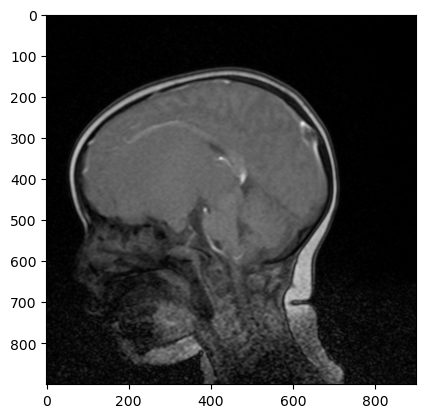

In [167]:
plt.imshow(im)

In [297]:
# read input image from your computer 
im = transform.resize(img_3c, (900, 900), order=3, preserve_range=True, anti_aliasing=True).astype(np.uint8)
img = torch.from_numpy(im.astype(np.uint8))
img = img.permute(2, 0, 1)

# create boxes 
box_1 = [330, 220, 450, 350]
box_2 = [530, 200, 650, 320] 
_box = [bb for _, bb in rois.items()]
# _box = [box_1, box_2]
box = torch.tensor(_box, dtype=torch.int) 
# box = box.unsqueeze(0) 

In [298]:
# draw bounding box and fill color 
img = draw_bounding_boxes(img, box, width=5, colors=["orange" for _ in range(len(_box))], fill=True) 
# transform this image to PIL image 
img = torchvision.transforms.ToPILImage()(img) 
  
# # display output 
# img.show() 

In [314]:
img.save('./bbox-example-cv2-findContours.png')

In [262]:
box.shape

torch.Size([4, 4])

In [261]:
box.unsqueeze(0)

tensor([[[798, 578, 818, 601],
         [857, 570, 900, 597],
         [793, 553, 815, 578],
         [833, 524, 874, 563]]], dtype=torch.int32)